<div align='center'>
    <h1>Tugas Besar DKA</h1>
    <h3>Kelompok 4</h3>
</div>

## Import

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz
from skfuzzy import control as ctrl
from skfuzzy.control import Antecedent, Consequent, Rule, ControlSystem, ControlSystemSimulation


## Fetching Data

In [2]:
#Fetch Data

## Visualisasi Membership Function

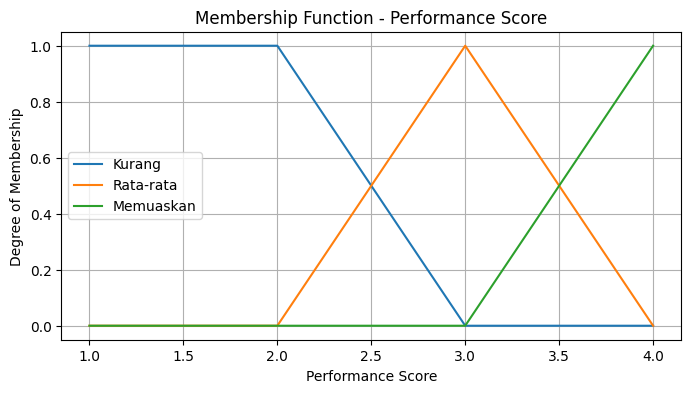

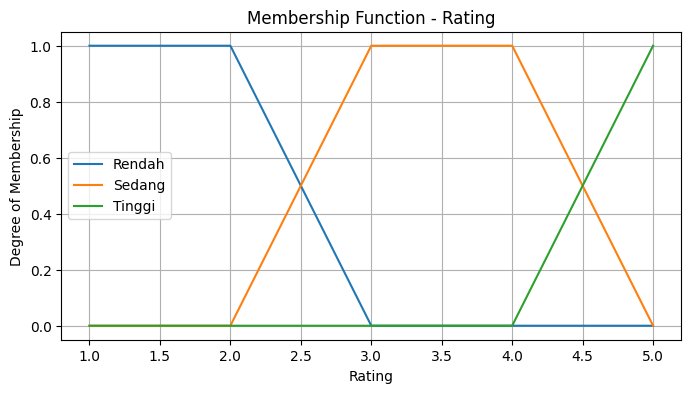

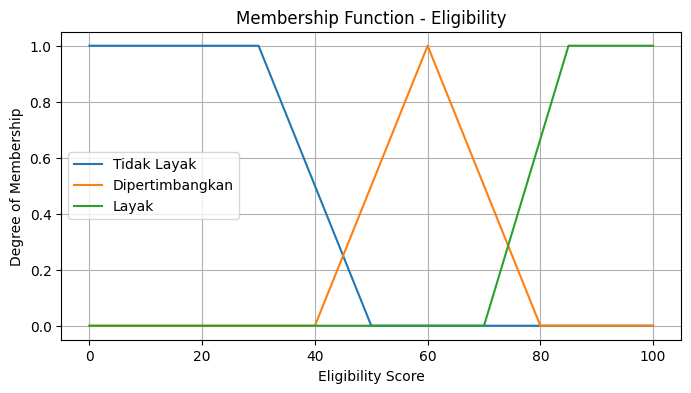

In [3]:
# Universe
performance_x = np.arange(1, 4.1, 0.1)
rating_x = np.arange(1, 5.1, 0.1)
eligibility_x = np.arange(0, 101, 1)

# Performance Score Membership Functions
kurang = fuzz.trapmf(performance_x, [1, 1, 2, 3])
rata = fuzz.trimf(performance_x, [2, 3, 4])
memuaskan = fuzz.trapmf(performance_x, [3, 4, 5, 5])

# Rating Membership Functions
rendah = fuzz.trapmf(rating_x, [1, 1, 2, 3])
sedang = fuzz.trapmf(rating_x, [2, 3, 4, 5])
tinggi = fuzz.trapmf(rating_x, [4, 5, 5, 6])

# Eligibility Membership Functions
tidak_layak = fuzz.trapmf(eligibility_x, [0, 0, 30, 50])
pertimbangan = fuzz.trimf(eligibility_x, [40, 60, 80])
layak = fuzz.trapmf(eligibility_x, [70, 85, 100, 100])

# Plot Performance Score
plt.figure(figsize=(8, 4))
plt.plot(performance_x, kurang, label='Kurang')
plt.plot(performance_x, rata, label='Rata-rata')
plt.plot(performance_x, memuaskan, label='Memuaskan')
plt.title('Membership Function - Performance Score')
plt.xlabel('Performance Score')
plt.ylabel('Degree of Membership')
plt.legend()
plt.grid(True)
plt.show()

# Plot Rating
plt.figure(figsize=(8, 4))
plt.plot(rating_x, rendah, label='Rendah')
plt.plot(rating_x, sedang, label='Sedang')
plt.plot(rating_x, tinggi, label='Tinggi')
plt.title('Membership Function - Rating')
plt.xlabel('Rating')
plt.ylabel('Degree of Membership')
plt.legend()
plt.grid(True)
plt.show()

# Plot Eligibility
plt.figure(figsize=(8, 4))
plt.plot(eligibility_x, tidak_layak, label='Tidak Layak')
plt.plot(eligibility_x, pertimbangan, label='Dipertimbangkan')
plt.plot(eligibility_x, layak, label='Layak')
plt.title('Membership Function - Eligibility')
plt.xlabel('Eligibility Score')
plt.ylabel('Degree of Membership')
plt.legend()
plt.grid(True)
plt.show()

## Fuzzy Mamdani

In [4]:

# Variabel input
performance = ctrl.Antecedent(np.arange(1, 4.1, 0.1), 'performance')  # 1 (PIP) to 4 (Exceeds)
rating = ctrl.Antecedent(np.arange(1, 5.1, 0.1), 'rating')            # 1 to 5

# Variabel output
eligibility = ctrl.Consequent(np.arange(0, 101, 1), 'eligibility')

# Membership function
performance['kurang'] = fuzz.trapmf(performance.universe, [1, 1, 2, 3])
performance['rata'] = fuzz.trimf(performance.universe, [2, 3, 4])
performance['memuaskan'] = fuzz.trapmf(performance.universe, [3, 4, 5, 5])

rating['rendah'] = fuzz.trapmf(rating.universe, [1, 1, 2, 3])
rating['sedang'] = fuzz.trapmf(rating.universe,  [2, 3, 4, 5])
rating['tinggi'] = fuzz.trapmf(rating.universe, [4, 5, 5, 6])

eligibility['tidak_layak'] = fuzz.trapmf(eligibility.universe, [0, 0, 30, 50])
eligibility['pertimbangan'] = fuzz.trimf(eligibility.universe, [40, 60, 80])
eligibility['layak'] = fuzz.trapmf(eligibility.universe, [70, 85, 100, 100])

# Rules
rules = [
    ctrl.Rule(performance['memuaskan'] & rating['tinggi'], eligibility['layak']),
    ctrl.Rule(performance['memuaskan'] & rating['sedang'], eligibility['layak']),
    ctrl.Rule(performance['memuaskan'] & rating['rendah'], eligibility['pertimbangan']),
    
    ctrl.Rule(performance['rata'] & rating['tinggi'], eligibility['layak']),
    ctrl.Rule(performance['rata'] & rating['sedang'], eligibility['pertimbangan']),
    ctrl.Rule(performance['rata'] & rating['rendah'], eligibility['tidak_layak']),
    
    ctrl.Rule(performance['kurang'] & rating['tinggi'], eligibility['pertimbangan']),
    ctrl.Rule(performance['kurang'] & rating['sedang'], eligibility['tidak_layak']),
    ctrl.Rule(performance['kurang'] & rating['rendah'], eligibility['tidak_layak']),
]

# Sistem kontrol|
system = ctrl.ControlSystem(rules)
sim = ctrl.ControlSystemSimulation(system)


def evaluate_eligibility_mamdani(performance_input, rating_input):
    if performance_input == "PIP":
        performance_input = 1
    elif performance_input == "Needs Improvement":
         performance_input = 2
    elif performance_input == "Fully Meets":
         performance_input = 3
    elif performance_input == "Exceeds":
         performance_input = 4
    sim.input['performance'] = performance_input
    sim.input['rating'] = rating_input
    sim.compute()
    
    # Hasil crisp
    nilai_crisp = sim.output['eligibility']
    print("Hasil Fuzzy Mamdani (nilai crisp):", round(nilai_crisp, 2))
    
    # Hitung derajat keanggotaan fuzzy untuk hasil crisp
    derajat_keanggotaan = {
        'Layak': fuzz.interp_membership(eligibility.universe, eligibility['layak'].mf, nilai_crisp),
        'Dipertimbangkan': fuzz.interp_membership(eligibility.universe, eligibility['pertimbangan'].mf, nilai_crisp),
        'Tidak Layak': fuzz.interp_membership(eligibility.universe, eligibility['tidak_layak'].mf, nilai_crisp)
    }

    # Cetak semua nilai keanggotaan
    for label, nilai in derajat_keanggotaan.items():
        print(f"{label} = {round(nilai, 3)}")

    # Tentukan output linguistik
    hasil_linguistik = max(derajat_keanggotaan.items(), key=lambda x: x[1])[0]
    print("Output linguistik:", hasil_linguistik)


In [5]:
#Sugeno

In [6]:
# Contoh pemanggilan Mamdani
evaluate_eligibility_mamdani("PIP", 5)
print("")

Hasil Fuzzy Mamdani (nilai crisp): 60.0
Layak = 0.0
Dipertimbangkan = 1.0
Tidak Layak = 0.0
Output linguistik: Dipertimbangkan

